Text(0.5, 1.0, 'Binary Sigmoid Function')

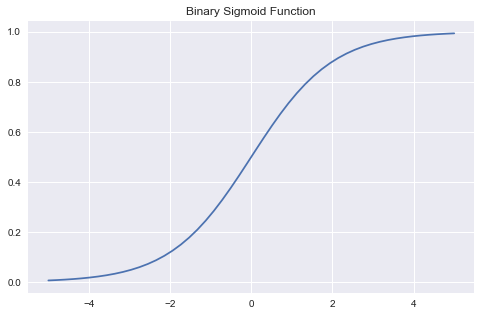

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.figure(figsize=(8,5))
def sigmoidBinary(t):
    return 1/(1+np.exp(-t))
t = np.linspace(-5,5)
plt.plot(t,sigmoidBinary(t))
plt.title("Binary Sigmoid Function")

Text(0.5, 1.0, 'Binary Sigmoid Function')

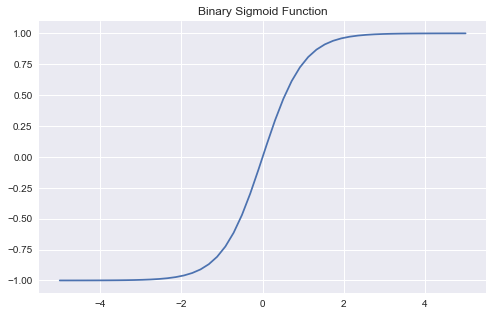

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.figure(figsize=(8,5))
def HyperbolicTan(t):
    return np.tanh(t)
t = np.linspace(-5,5)
plt.plot(t,HyperbolicTan(t))
plt.title("Binary Sigmoid Function")

Text(0.5, 1.0, 'Binary Sigmoid Function')

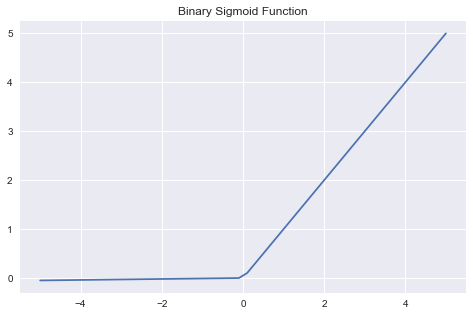

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.figure(figsize=(8,5))
def LeakyRectifiedLinearUnit(t):
    lst = []
    for i in t:
        if i>=0:
            lst.append(i)
        else:
            lst.append(0.01*i)
    return lst
t = np.linspace(-5,5)
plt.plot(t,LeakyRectifiedLinearUnit(t))
plt.title("Binary Sigmoid Function")

Text(0.5, 1.0, 'Binary Sigmoid Function')

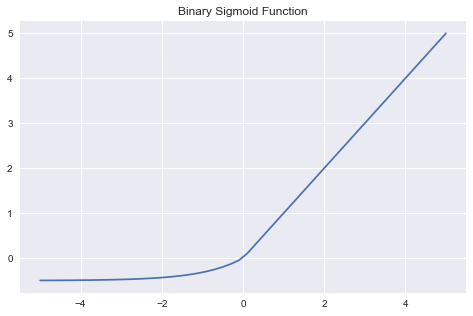

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.figure(figsize=(8,5))
def elu(t):
    lst = []
    for i in t:
        if i<0:
            lst.append(0.5*(np.exp(i)-1))
        else:
            lst.append(i)
    return lst
t = np.linspace(-5,5)
plt.plot(t,elu(t))
plt.title("Binary Sigmoid Function")

Text(0.5, 1.0, 'Softmax Function')

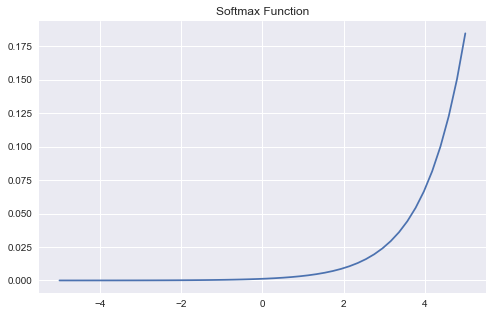

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.figure(figsize=(8,5))
def Softmax(t):
    return np.exp(t)/np.sum(np.exp(t))
t = np.linspace(-5,5)
plt.plot(t,Softmax(t))
plt.title("Softmax Function")

Text(0.5, 1.0, 'Binary Sigmoid Function')

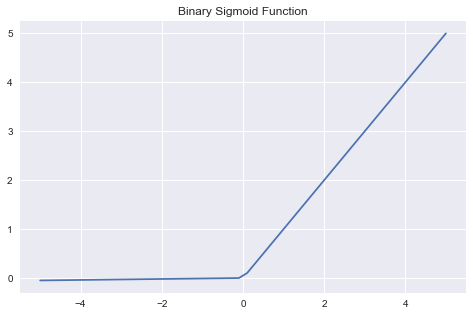

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.figure(figsize=(8,5))
def RectifiedLinearUnit(t):
    lst = []
    for i in t:
        if i>=0:
            lst.append(i)
        else:
            lst.append(0)
    return lst
t = np.linspace(-5,5)
plt.plot(t,LeakyRectifiedLinearUnit(t))
plt.title("Binary Sigmoid Function")

In [ ]:
import tensorflow as tf
opt = tf.keras.optimizers.RMSprop(learning_rate = 0.1)
var1 = tf.Variable(10.0)
loss = lambda: (var1 **2) / 2.0
step_count = opt.minimize(loss, [var1]).numpy()
var1.numpy()

9.683772

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate = 0.1)
var1 = tf.Variable(10.0)
loss = lambda: (var1 **2) / 2.0
step_count = opt.minimize(loss, [var1]).numpy()
var1.numpy()

9.0

In [ ]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate = 0.1)
var1 = tf.Variable(10.0)
loss = lambda: (var1 **2) / 2.0
step_count = opt.minimize(loss, [var1]).numpy()
var1.numpy()

9.9

C:\Users\USER\anaconda3\envs\keras_env\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Train: 0.003, Test: 0.009


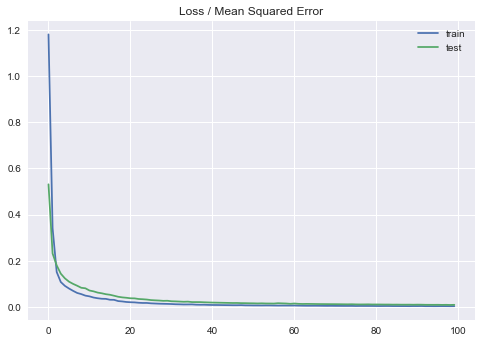

In [ ]:
# mlp for regression with mse loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
#pip install sklearn

Train: 0.001, Test: 0.003


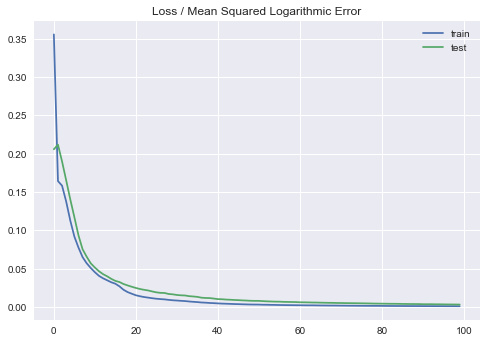

In [ ]:
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
pyplot.title('Loss / Mean Squared Logarithmic Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Train: 0.048, Test: 0.059


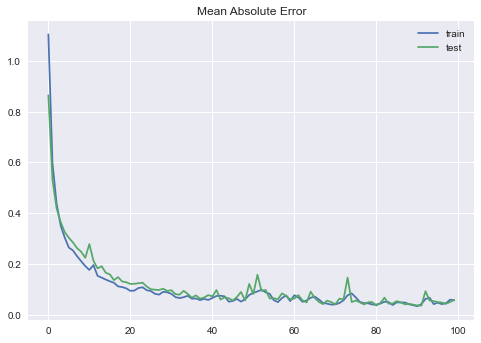

In [ ]:
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_absolute_error', optimizer=opt)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
pyplot.title('Mean Absolute Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()